# **Trabalho de Aprendizado de Máquina Não Supervisionado**

Projeto de Aprendizado Não Supervisionado
Aprendizado não supervisionado da Hemovigilância em Pós-Mercado utilizando linguagem Python (Banco de dados Pandas)

Arquivo implemento com três algoritmos de aprendizado não supervisionado (PCA, K Means e Agrupamento Hierárquico)

Link do Repositório:

https://github.com/Aramischangchain/Projeto-Aprendizado-N-o-Supervisionado

Link do Dataset:

https://dados.gov.br/dataset/hemovigilancia-em-pos-mercado/resource/d10c76b6-ff9e-4be8-8720-2d0f2dc2310e

Link do Dicionário de Dados:

https://dados.gov.br/dataset/hemovigilancia-em-pos-mercado/resource/1969c163-448d-4400-b7b5-c5c2f664fc61

Integrantes:

Aramis Chang Chain, RGM: 8813440250

Luiz Felipe, RGM: 8813216082

Instituição: Universidade Positivo

Curso: Sistemas de Informação

Matéria: Data Science

Turma: BSI - Quarta

Professora: https://github.com/marycamila184

Dados limpos do trabalho do primeiro bimestre se encontram em:

https://drive.google.com/file/d/1rQd-XjsD_Uw6TTHR29L9OH_ZLkiVX91H/view?usp=share_link

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('/content/drive/MyDrive/DADOS_ABERTOS_HEMOVILIGANCIA_DADOSLIMPOS.csv',
                    sep=',', encoding='utf-8')


In [11]:
df.head(40)

,Notificacao,Data da Ocorrencia,Data do Evento,Status da Analise,Tipo Reacao Transfusional,Grau Risco,Categoria do Notificador,Tipo de Hemocomponente,Faixa Etaria do Paciente,UF da Notificacao
0,200612000141,06/20/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
1,200612000144,06/14/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,PLASMA FRESCO CONGELADO,DE 30 A 39 ANOS,SC
2,200612000146,04/24/2006 00:00:00,12/22/2006 00:00:00,Concluída,Sobrecarga circulatória associada à transfusão...,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS,SC
3,200612000152,07/18/2006 00:00:00,12/22/2006 00:00:00,Concluída,Outras reações imediatas (OI),Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
4,200612000154,08/16/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS,SC
5,200612000156,08/17/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 50 A 59 ANOS,SC
6,200612000157,06/15/2006 00:00:00,12/22/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 40 A 49 ANOS,SC
7,200612000161,09/12/2006 00:00:00,12/23/2006 00:00:00,Concluída,Reação alérgica (ALG),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 20 A 29 ANOS,SC
8,200612000164,09/22/2006 00:00:00,12/23/2006 00:00:00,Concluída,Outras reações imediatas (OI),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS + CONCENTRADO DE PLA...,DE 40 A 49 ANOS,SC
9,200612000166,09/23/2006 00:00:00,12/23/2006 00:00:00,Concluída,Reação febril não hemolítica (RFNH),Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 40 A 49 ANOS,SC


**Segunda limpeza dos dados:** 

Retirada de colunas com muitas variantes

In [12]:
lista_colunas_removidas = [
'Data da Ocorrencia', 'Data do Evento', 'Notificacao', 'Tipo Reacao Transfusional', 'UF da Notificacao'
]

df = df.drop(columns = lista_colunas_removidas)

In [14]:
df.head()

,Status da Analise,Grau Risco,Categoria do Notificador,Tipo de Hemocomponente,Faixa Etaria do Paciente
0,Concluída,Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS
1,Concluída,Grau I - Leve,Rede Sentinela,PLASMA FRESCO CONGELADO,DE 30 A 39 ANOS
2,Concluída,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,DE 60 A 69 ANOS
3,Concluída,Grau III - Grave,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS
4,Concluída,Grau I - Leve,Rede Sentinela,CONCENTRADO DE HEMÁCIAS,MAIOR DE 70 ANOS


In [13]:
df.dtypes

Status da Analise           object
Grau Risco                  object
Categoria do Notificador    object
Tipo de Hemocomponente      object
Faixa Etaria do Paciente    object
dtype: object

Mudar os dados "object" para "int64"

In [16]:
df['Status da Analise'].unique()

array(['Concluída', 'Não Concluída'], dtype=object)

In [17]:
df['Status da Analise'].replace({'Concluída': 0, 'Não Concluída': 1}, inplace=True)

In [18]:
df['Grau Risco'].unique()

array(['Grau I   - Leve', 'Grau III - Grave', 'Grau IV  - Óbito',
       'Grau II  - Moderado', 'Não informado'], dtype=object)

In [19]:
df['Grau Risco'].replace({'Grau I   - Leve': 0, 'Grau II  - Moderado': 1, 'Grau III - Grave': 2, 'Grau IV  - Óbito': 3, 'Não informado': 4}, inplace=True)

In [20]:
df['Categoria do Notificador'].unique()

array(['Rede Sentinela', 'Não especificado',
       'Estabelecimento de Assistência à Saúde', 'Serviço de Hemoterapia',
       'Demais categorias'], dtype=object)

In [21]:
df['Categoria do Notificador'].replace({'Rede Sentinela': 0, 'Não especificado': 1, 'Estabelecimento de Assistência à Saúde': 2, 'Serviço de Hemoterapia': 3, 'Demais categorias': 4}, inplace=True)

In [22]:
df['Tipo de Hemocomponente'].unique()

array(['CONCENTRADO DE HEMÁCIAS', 'PLASMA FRESCO CONGELADO',
       'CONCENTRADO DE HEMÁCIAS  +  CONCENTRADO DE PLAQUETAS',
       'CONCENTRADO DE PLAQUETAS', 'PLASMA - OUTRO TIPO',
       'CONCENTRADO DE HEMÁCIAS  +  PLASMA FRESCO CONGELADO',
       'CONCENTRADO DE HEMÁCIAS  +  OUTRO',
       'CONCENTRADO DE HEMÁCIAS  +  CONCENTRADO DE PLAQUETAS  +  PLASMA FRESCO CONGELADO',
       'OUTRO', 'CRIOPRECIPITADO', 'CONCENTRADO DE GRANULÓCITOS',
       'CONCENTRADO DE PLAQUETAS  +  PLASMA FRESCO CONGELADO',
       'CRIOPRECIPITADO  +  PLASMA FRESCO CONGELADO', 'SANGUE TOTAL',
       'CONCENTRADO DE HEMÁCIAS  +  PLASMA - OUTRO TIPO',
       'CONCENTRADO DE HEMÁCIAS  +  SANGUE TOTAL',
       'CONCENTRADO DE HEMÁCIAS  +  OUTRO  +  PLASMA - OUTRO TIPO',
       'SANGUE TOTAL RECONSTITUÍDO',
       'CONCENTRADO DE HEMÁCIAS  +  CONCENTRADO DE PLAQUETAS  +  CRIOPRECIPITADO  +  PLASMA FRESCO CONGELADO',
       'CONCENTRADO DE HEMÁCIAS  +  PLASMA - OUTRO TIPO  +  PLASMA FRESCO CONGELADO',
       'CON

Pela coluna "Tipo de Hemocomponente" ter muitas variáveis, retiramos essa coluna tbm

In [23]:
lista_colunas_removidas1 = [
'Tipo de Hemocomponente'
]

df = df.drop(columns = lista_colunas_removidas1)

In [25]:
df['Faixa Etaria do Paciente'].unique()

array(['DE 60 A 69 ANOS', 'DE 30 A 39 ANOS', 'MAIOR DE 70 ANOS',
       'DE 50 A 59 ANOS', 'DE 40 A 49 ANOS', 'DE 20 A 29 ANOS',
       'DE 10 A 19 ANOS', 'DE 5 A 9 ANOS', 'DE 1 A 4 ANOS', '< 1 ANO',
       'NÃO ESPECIFICADA'], dtype=object)

In [26]:
df['Faixa Etaria do Paciente'].replace({'< 1 ANO': 0, 'DE 1 A 4 ANOS': 1, 'DE 5 A 9 ANOS': 2, 'DE 10 A 19 ANOS': 3, 'DE 20 A 29 ANOS': 4, 'DE 30 A 39 ANOS': 5, 'DE 40 A 49 ANOS': 6, 'DE 50 A 59 ANOS': 7, 'DE 60 A 69 ANOS': 8, 'MAIOR DE 70 ANOS': 9, 'NÃO ESPECIFICADA': 10}, inplace=True)

In [27]:
df.dtypes

Status da Analise           int64
Grau Risco                  int64
Categoria do Notificador    int64
Faixa Etaria do Paciente    int64
dtype: object

### Análise dos Componentes Principais (PCA)

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [28]:
pca = PCA(n_components=2)

In [29]:
pca_transform = pca.fit_transform(df)

In [30]:
pca_transform.shape

(165407, 2)

In [31]:
pca_transform

array([[-1.73333888, -1.52188945],
       [ 1.25647368, -1.31570955],
       [-1.82460312, -1.51642462],
       ...,
       [-0.87089174,  0.51739433],
       [ 0.05722948,  1.58346106],
       [ 1.12231663,  0.6548476 ]])

In [32]:
pca.explained_variance_ratio_

array([0.74014157, 0.18723532])

In [35]:
df_pca = df.iloc[:,:].values
df_pca

array([[0, 0, 0, 8],
       [0, 0, 0, 5],
       [0, 2, 0, 8],
       ...,
       [1, 0, 2, 7],
       [1, 0, 3, 6],
       [1, 0, 2, 5]])

In [33]:
pca.explained_variance_ratio_.sum()

0.9273768821438498

In [36]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(pca_transform, labels=labels,
    dimensions=range(2), # numero de componentes do pca (PCA(n_components=2))
    color=df["Faixa Etaria do Paciente"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Aprendizado de Máquina Não Supervisionado - K Means com PCA**

#Escalonamento

In [39]:
escala = StandardScaler()
df_esc = escala.fit_transform(df)
df_esc

array([[-0.44841189, -0.3869551 , -1.14786426,  0.76766303],
       [-0.44841189, -0.3869551 , -1.14786426, -0.47927394],
       [-0.44841189,  2.61551155, -1.14786426,  0.76766303],
       ...,
       [ 2.23009252, -0.3869551 ,  0.48957868,  0.35201737],
       [ 2.23009252, -0.3869551 ,  1.30830015, -0.06362828],
       [ 2.23009252, -0.3869551 ,  0.48957868, -0.47927394]])

In [40]:
df_esc.shape

(165407, 4)

In [41]:
from sklearn.decomposition import PCA

#Elbow Method

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(pca_transform)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

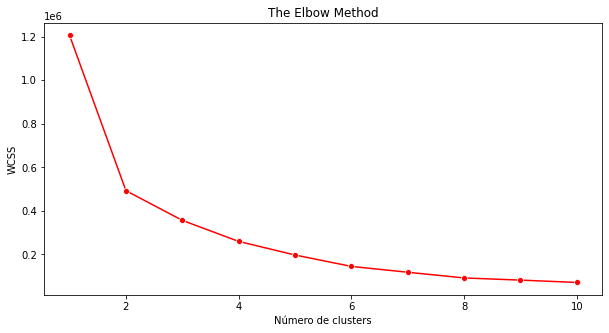

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [47]:
kmeans_fit = kmeans.fit(pca_transform)

In [48]:
# Coordenadas dos Centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 1.03867833,  0.57244986],
       [-2.18371065,  0.82014293],
       [ 3.55415871, -0.20671386],
       [-1.38762482, -1.42069305]])

In [49]:
# Classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([3, 0, 3, ..., 1, 0, 0], dtype=int32)

In [50]:
classificacao[2]

3

In [51]:
import plotly.express as px
import plotly.graph_objects as go

In [54]:
graf1 = px.scatter(x = pca_transform[:,0], y = pca_transform[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

Output hidden; open in https://colab.research.google.com to view.